# Задание 1 по курсу «Байесовский выбор моделей»


### Задача 1

Пусть проводится эксперимент по угадыванию стороны выпадания честной честной монеты. Известно, что оракул прав с вероятностью $p_1 = 0.9$, а обычный человек с вероятностью $p_2 = 0.5$. Известно, что челочек P оказался прав во всех $n = 10$ бросаниях. С какой вероятностью P является оракулом, если случайный человек оказывается оракулом с вероятностью $10^{-4}$ (3 балла)? Пусть человек P выбран не случайно, а как лучший среди 100 человек по угадыванию $k = 100$ выпадений монеты. Вывести новую априорную вероятность того, что P оракул с учётом его неслучайного выбора (7 баллов).

1. аналитически (приближенно) для случая $k >> 1$
2. сэплированием для значений k от 1 до 1000. Построить график для разных k.


#### Решение:


Пусть A - событие "P - оракул", B - событие "прав во всех n бросках". Тогда распишем через формулу Байеса событие $A \cdot B$.

$$
P(A \cdot B) = P(A)P(B|A) = P(B)P(A|B)
$$, тогда выразим событие $P(A|B)$, т.к. у нас произошло то, что человек, оказался прав, а мы хотим узнать с какой вероятностью он окажется оракулом.

$$
P(A|B) = \frac{P(A)P(B|A)}{P(B)}
$$
Через формулу полной вероятности посчитаем вероятность $P(B) = P(A)P(B|A) + P(\overline{A})P(B|\overline{A})$
$$
P(A|B) = \frac{10^{-4}p_1^n}{10^{-4}p_1^n + (1-10^{-4})p_2^n} = \frac{10^{-4}(0.9)^n}{10^{-4}(0.9)^n + (1-10^{-4})(0.5)^n} = 0.03448
$$

In [6]:
print("P(A|B) = ", round((1e-4 * (0.9 ** 10)) / (1e-4 * (0.9 ** 10) + (1-1e-4) * (0.5 ** 10)), 5))

P(A|B) =  0.03448


Теперь перейдем к пункту, где нужно посчитать вероятность при условии того, что P - самый "удачливый" человек из 100 людей, которые угадывали сторону монетки. Пусть событие $C_j$ - j человек среди 100 оракулы.
$$
P(C_j) = C_{100}^j(10^{-4})^j \cdot (1-10^{-4})^{100 - j}
$$

Посчитаем вероятности для первых $j = \overline{0, 10}$


In [15]:
import math

def calculate_probability(j, p1 = 1e-4, n = 100, k = 100):
    return math.comb(n, j) * (p1 ** j) * ((1-p1) ** (k-j))
probability_sum = 0
for j in range(0, 101):
    print(f"P(C_{j}) = {calculate_probability(j)}")
for j in range(2, 101):
    probability_sum += calculate_probability(j)
print("The probability that there will be more than two Oracles = ", round(probability_sum, 6))

P(C_0) = 0.9900493386913719
P(C_1) = 0.009901483535267246
P(C_2) = 4.901724522409528e-05
P(C_3) = 1.601390149668746e-07
P(C_4) = 3.883759488895599e-10
P(C_5) = 7.457563975077058e-13
P(C_6) = 1.1808990526257968e-15
P(C_7) = 1.5859373215439386e-18
P(C_8) = 1.8438365199468233e-21
P(C_9) = 1.8849991647510057e-24
P(C_10) = 1.7155207920026157e-27
P(C_11) = 1.4037482955589688e-30
P(C_12) = 1.0412174409503303e-33
P(C_13) = 7.048946033344031e-37
P(C_14) = 4.38085454903298e-40
P(C_15) = 2.5119411355591313e-43
P(C_16) = 1.3346021884846372e-46
P(C_17) = 6.595164447780632e-50
P(C_18) = 3.0414077472513498e-53
P(C_19) = 1.3127388279596943e-56
P(C_20) = 5.317123965633325e-60
P(C_21) = 2.0257736118881702e-63
P(C_22) = 7.275096388691845e-67
P(C_23) = 2.4674533467171234e-70
P(C_24) = 7.917204541171555e-74
P(C_25) = 2.407070887604913e-77
P(C_26) = 6.944168131058049e-81
P(C_27) = 1.9034067914135697e-84
P(C_28) = 4.962949715442636e-88
P(C_29) = 1.2323038493913868e-91
P(C_30) = 2.9167441179714125e-95
P(C_31)

Вероятность того, что оракулов окажется больше одного крайне мала (результат выше), поэтому можем расмматривать случай только когда он есть или его нет среди этих ста человек. 

$\overline{D}$ - событие "среди 100 нет ни одного оракула", D - событие "среди 100 человек есть один оракул", E - событие "оракул угадает лучше других". Также условимся, что $P(C_0) = 0.99$, $P(C_1) = 0.01$.
Посчитаем вероятность того, что этот оракул победит:
$$

$$

Тогда нужно посчитать вероятность:
$$
P(A) = P(D)P(A|D) + P(\overline{D})P(A|\overline{D}) = P(D)P(A|D) + 0.99 \cdot 0 = P(D)P(A|D)
$$

Посчитаем эту вероятность, пусть у нас случайная величина $\theta_1$ - количество правильно угаданных сторон монеты оракулом $Binom(100, 0.9)$, $\theta_2$ - количество правильно угаданных сторон монеты оракулом $Binom(100, 0.5)$. С условием того, что $k \gg 1$, то будем считать, что $\theta_1 \sim Norm(90, 9)$, $\theta_2 \sim Norm(50, 25)$, тогда $\theta_1 - \theta_2 \sim Norm(40, 34)$

$$
P(\theta_1 < \theta_2) = P(\theta_1 - \theta_2 < 0) = \int_{-\infty}^{0} \frac{1}{\sqrt{2 \pi 34}}  e^{-\frac{(x-40)^2}{2\cdot34}} dx = / y = \frac{x-40}{\sqrt{34}} / = \frac{1}{\sqrt{2\pi} 34}\int_{-\infty}^{\frac{-40}{\sqrt{34}}} e^{-y^2/2} dy \approx 0
$$

Тогда, считаем, что если оракул есть, то он лучше всех с вероятностью 1.

Получается, что $P(A) = P(D)P(A|D) = 1\cdot0.01 = 0.01$
$$
P(A|B) = \frac{10^{-2}\cdotp_1^n}{10^{-2}p_1^n + (1-10^{-2})p_2^n} = \frac{10^{-2}(0.9)^n}{10^{-2}(0.9)^n + (1-10^{-2})(0.5)^n} = 0.783
$$

In [16]:
print("P(A|B) = ", round((1e-2 * (0.9 ** 10)) / (1e-2 * (0.9 ** 10) + (1-1e-2) * (0.5 ** 10)), 5))

P(A|B) =  0.78292


Теперь перейдем к сэплированию для $k = \overline{1, 1000}$

In [20]:
from tqdm import tqdm
import numpy as np
p1 = 0.9
p2 = 0.5
n = 10
P_A_apr = 1e-4
num_people = 100
N_exps = 1000

P_A = []
for k in tqdm(range(1, 1001)):
    wins_oracle = 0
    for _ in range(1, N_exps+1):
        num_oracles = np.random.binomial(1, 1e-4, size=num_people)
        max_sum = 0
        winner = 0
        for i in num_oracles:
            if i == 1: 
                num_coins = np.random.binomial(1, p1, size=k).sum()
            else: 
                num_coins = np.random.binomial(1, p2, size=k).sum()
            if max_sum < num_coins:
                max_sum = num_coins
                winner = i
        if winner:
            wins_oracle += 1

    P_A.append(float(wins_oracle)/N_exps)


100%|██████████| 1000/1000 [21:44<00:00,  1.30s/it]


Mean:  0.0099 Std:  0.0032


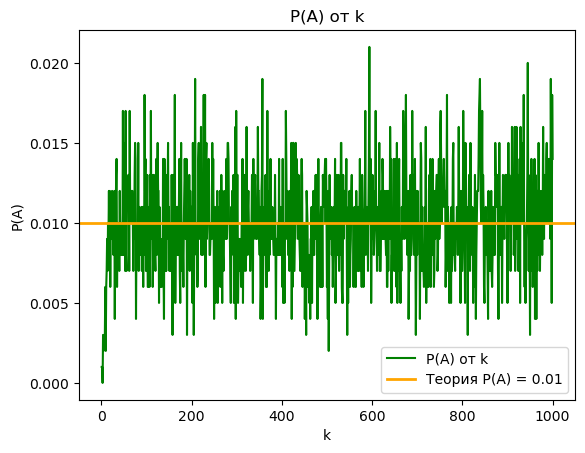

In [21]:
# график P_A в зависимости от k
import matplotlib.pyplot as plt
print("Mean: ", round(np.mean(P_A), 4), "Std: ", round(np.std(P_A), 4))

plt.title("P(A) от k")
plt.plot(range(1, 1001), P_A, color='g', label="P(A) от k")
plt.axhline(0.01, color='orange', linewidth=2, label="Теория P(A) = 0.01")
plt.xlabel("k")
plt.ylabel("P(A)")
plt.legend()
plt.show()

Заметим, что частота, которую мы получили из экспериментов сконцентрирована около теоретической оценки $\approx 0.01$, среднее значение для $k=\overline{1, 1000}$ близко к теоретической оценке, даже лежит в пределах меньше одной сигмы, из чего можно сделать вывод, что практика согласуется с теорией.

#### Ответ:
1. $P(A|B) = 0.03448$
2. $P(A) = 0.01$
3. $P(A|B) = 0.78292$
4. Практическая оценка близка к теоретической.

### Задача 2.
Пусть имеется НОР выборка $\{ x_1, ..., x_n \}$ из неизвестного распределения с конечной плотностью. На уровне значимости $\alpha = 0.05$ проверить гипотезу о том, что десятипроцентный квантиль этого распределения равен $m_0 = 0$.

#### Решение:
Рассмотрим истинную функцию распределения F(x), наша гипотеза $H_0$: $F(m_0)=0.1$.

Запишем эмпирическую функцию распределения:
$$
\hat{F_n}(x) = \frac{1}{n} \sum_{i=1}^n \mathbb{1}\{x_i < x \}
$$

Статистика $T(x) = \hat{F_n}(x) - 0.1$

Рассмотрим на распределение этой статистики:
$$
n \hat{F_n}(x) \sim Binom \left(n, F(X) \right) \rightarrow_{n \rightarrow \infty}^d Norm\left(nF(x), nF(X)(1-F(X))\right)
$$

Получаем: 
$$
T(x) = \hat{F_n}(x) - 0.1 \sim \frac{1}{n} Norm \left(0.1n, 0.09n \right) - 0.01 = Norm \left(0, \frac{9}{100n} \right)
$$

Рассмотрим критическую область:
$$
U = \{ x \in \mathbb{R}^n : |T(x)| \ge t_{\alpha} \}
$$, $t_{\alpha}$ квантиль ранее полученного распределения, $\alpha = 0.05$, сл-но $t_{\alpha} = 1- \frac{\alpha}$

Используем правило двух сигм, $t_{\alpha} = 2 \cdot \sigma$
И получим, что:
$$
P(H_{кр}|H_0) \le 1 - (1-\frac{\alpha}{2}) + \frac{\alpha}{2} \leq \alpha
$$

#### Ответ:
Получили, что гипотеза не отвергается.

### Задача 3

Пусть имеется выборка пар $z_i = (x _i, y_i), i=\overline{1, n}$,
$$
z_i \sim Norm \left(z_i | (0, 0)^T, \left(\begin{array}{cc} 
1 & \rho \\ 
\rho & 1
\end{array}\right) \right)
$$


**Гипотеза $H_0$**: $\rho = 0$

Для статистики $T(Z) = \frac{1}{n} \sum\limits_{i=1}^n x_i y_i$ получить:
1. распределение разных значений $\rho$ и нарисовать плотность для $\rho = 0$ и $\rho = 0.5$ для $n = 100$ 
2. построить критерий для проверки гипотезы $\rho = 0$ на уровне значимости $\alpha = 0.05$
3. зависимость мощности данного критерия от истинного $\rho$ сэплированием и приближенно аналитически, и предложить формулу зависимости мощности критерия от n и $\rho$.
4. Сравнить мощность в зависимости от $\rho$ со статистикой $T(Z) = \frac{1}{2n} \sum\limits_{i=1}^n (x_i - y_i)^2$, рассмотренной на лекции.

Какую статистику вы предложили бы для использования на практике? 

#### Решение:
1. Теперь у нас будет выборка ${x_1y_1, x_2y_2, ..., x_ny_n}, она будет простой потому что со сложной мы работать не умеем. Нужно найти её матожидание и дисперсию. 

$$
m = \mathbb{E} \left( x_iy_I \right) = cov(x_i, y_i) + \mathbb{E}x_i \mathbb{E}y_i = \rho
$$

$$
\Sigma^2 = \mathbb{E} \left(x_iy_i \right)^2 - \rho^2 = \left() \mathbb{E} x_iy_i \right)^2 + \mathbb{E} x_i^2 \mathbb{E} y_i^2 + \left(\mathbb{E} x_iy_i \right)^2 - \rho^2 = 1+\rho^2
$$

Используем Центральную предельную теорему на статистику $T(Z)$.
$$
T(Z) = \frac{1}{n} \sum\limits_{i=1}^n x_iy_i \rightarrow_{n \rightarrow \infty}^d Norm(m, \Sigma) = Norm \left(\rho, \frac{1+\rho}{n} \right)
$$

Теперь построим графики для $n = 100$, $\rho = 0$ и $\rho = 0.5$, $Norm\left(0, \frac{1}{n} \right)$ и $Norm \left( 0.5, \frac{1.25}{n} \right)$ соотвественно.

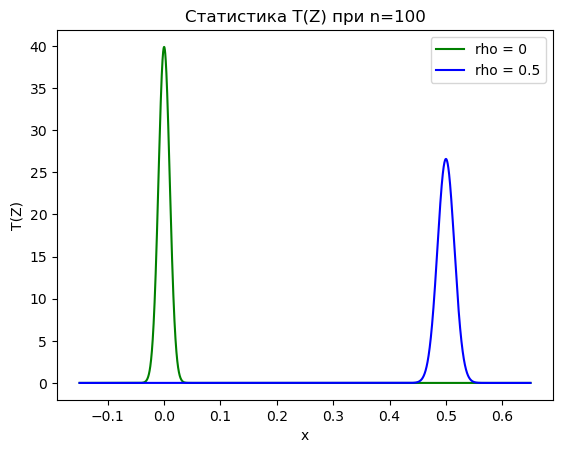

In [8]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
n = 100
rho0 = 0
rho1 = 0.5
x = np.linspace(-0.15, 0.65, 10**5)
plt.plot(x, st.norm.pdf(x, rho0, (1+rho0)/n), color='green', label='rho = 0')
plt.plot(x, st.norm.pdf(x, rho1, (1+rho1)/n), color='blue', label='rho = 0.5')
plt.title("Статистика T(Z) при n=100")
plt.xlabel('x')
plt.ylabel('T(Z)')
plt.legend()
plt.show()

2. Выпишем критическую область для $t_{\alpha} = 1 -\frac{\alpha}{2}$ - квантиль распределения $Norm(0, \frac{1}{n})$, $\alpha = 0.5$, по предыдыщему опыту используем правило двух сигм $t_{\alpha} = 2\sigma = \frac{2}{\sqrt{n}}$: 
$$
U_{кр} = \{ Z \in \mathbb{R}^{2n} | |T(Z)| \le t_{\alpha} \}
$$
$$
\mathbb{P}\{Z \in U_{кр}|H_0 \} \le 1 - (1 -\frac{\alpha}{2}) + \frac{\alpha}{2} \le \alpha
$$
Гипотеза не отвергается на уровне значимости $\alpha$.

3. Начнем с аналитического решения, $F_{\xi}(x)$ - кумулятивная функция распределения $Norm \left( \rho, \frac{1+\rho}{n} \right)$
$$
W(T) = \mathbb{P} \{Z \in U_{кр} | \overline{H_0} \} = 1 - F_{\xi} \left(\frac{2}{\sqrt{n}} \right) + F_{\xi} \left(\frac{-2}{\sqrt{n}} \right) =
$$
$$
= 1 - F_{Norm(0, 1)} \left(\frac{(2-\rho)\sqrt{n}}{\sqrt{1+\rho^2}} \right) + F_{Norm(0, 1)} \left(\frac{(-2-\rho)\sqrt{n}}{\sqrt{1+\rho^2}} \right) 
$$

$W(T) \rightarrow_{n \rightarrow \infty} 1$, когда $\rho \not= 0$

In [100]:
def get_W_analytic(rho, n):
    return 1 - st.norm.cdf((2-rho*np.sqrt(n))/np.sqrt(1+rho*rho)) + st.norm.cdf((-2-rho*np.sqrt(n))/np.sqrt(1+rho*rho))
def get_T(samples):
    return np.mean([x[0]*x[1] for x in samples])/2
def get_W_sample(func, rho, n, t_right, t_left=-1, num_exps=1000):
    in_ = []
    mean = np.array([0, 0])
    sigma = np.array([[1, rho], [rho, 1]])
    for _ in range(num_exps):
        value_func = np.abs(func(np.random.multivariate_normal(mean, sigma, size=n)))
        if not(t_left <= value_func <= t_right):
            in_.append(1)
        else:
            in_.append(0)
    return np.mean(in_)

In [101]:
from collections import defaultdict 
w_exps = defaultdict(list)
w_anal = defaultdict(list)
for num in tqdm([5, 10, 20, 50, 100, 500, 1000, 2500, 5000]):
    t_alpha = 2./np.sqrt(n)
    for rho in np.linspace(-1, 1, 100):
        w_exps[num].append(get_W_sample(get_T, rho, n, t_alpha, -t_alpha))
        w_anal[num].append(get_W_analytic(rho, num))

100%|██████████| 9/9 [42:50<00:00, 285.65s/it]


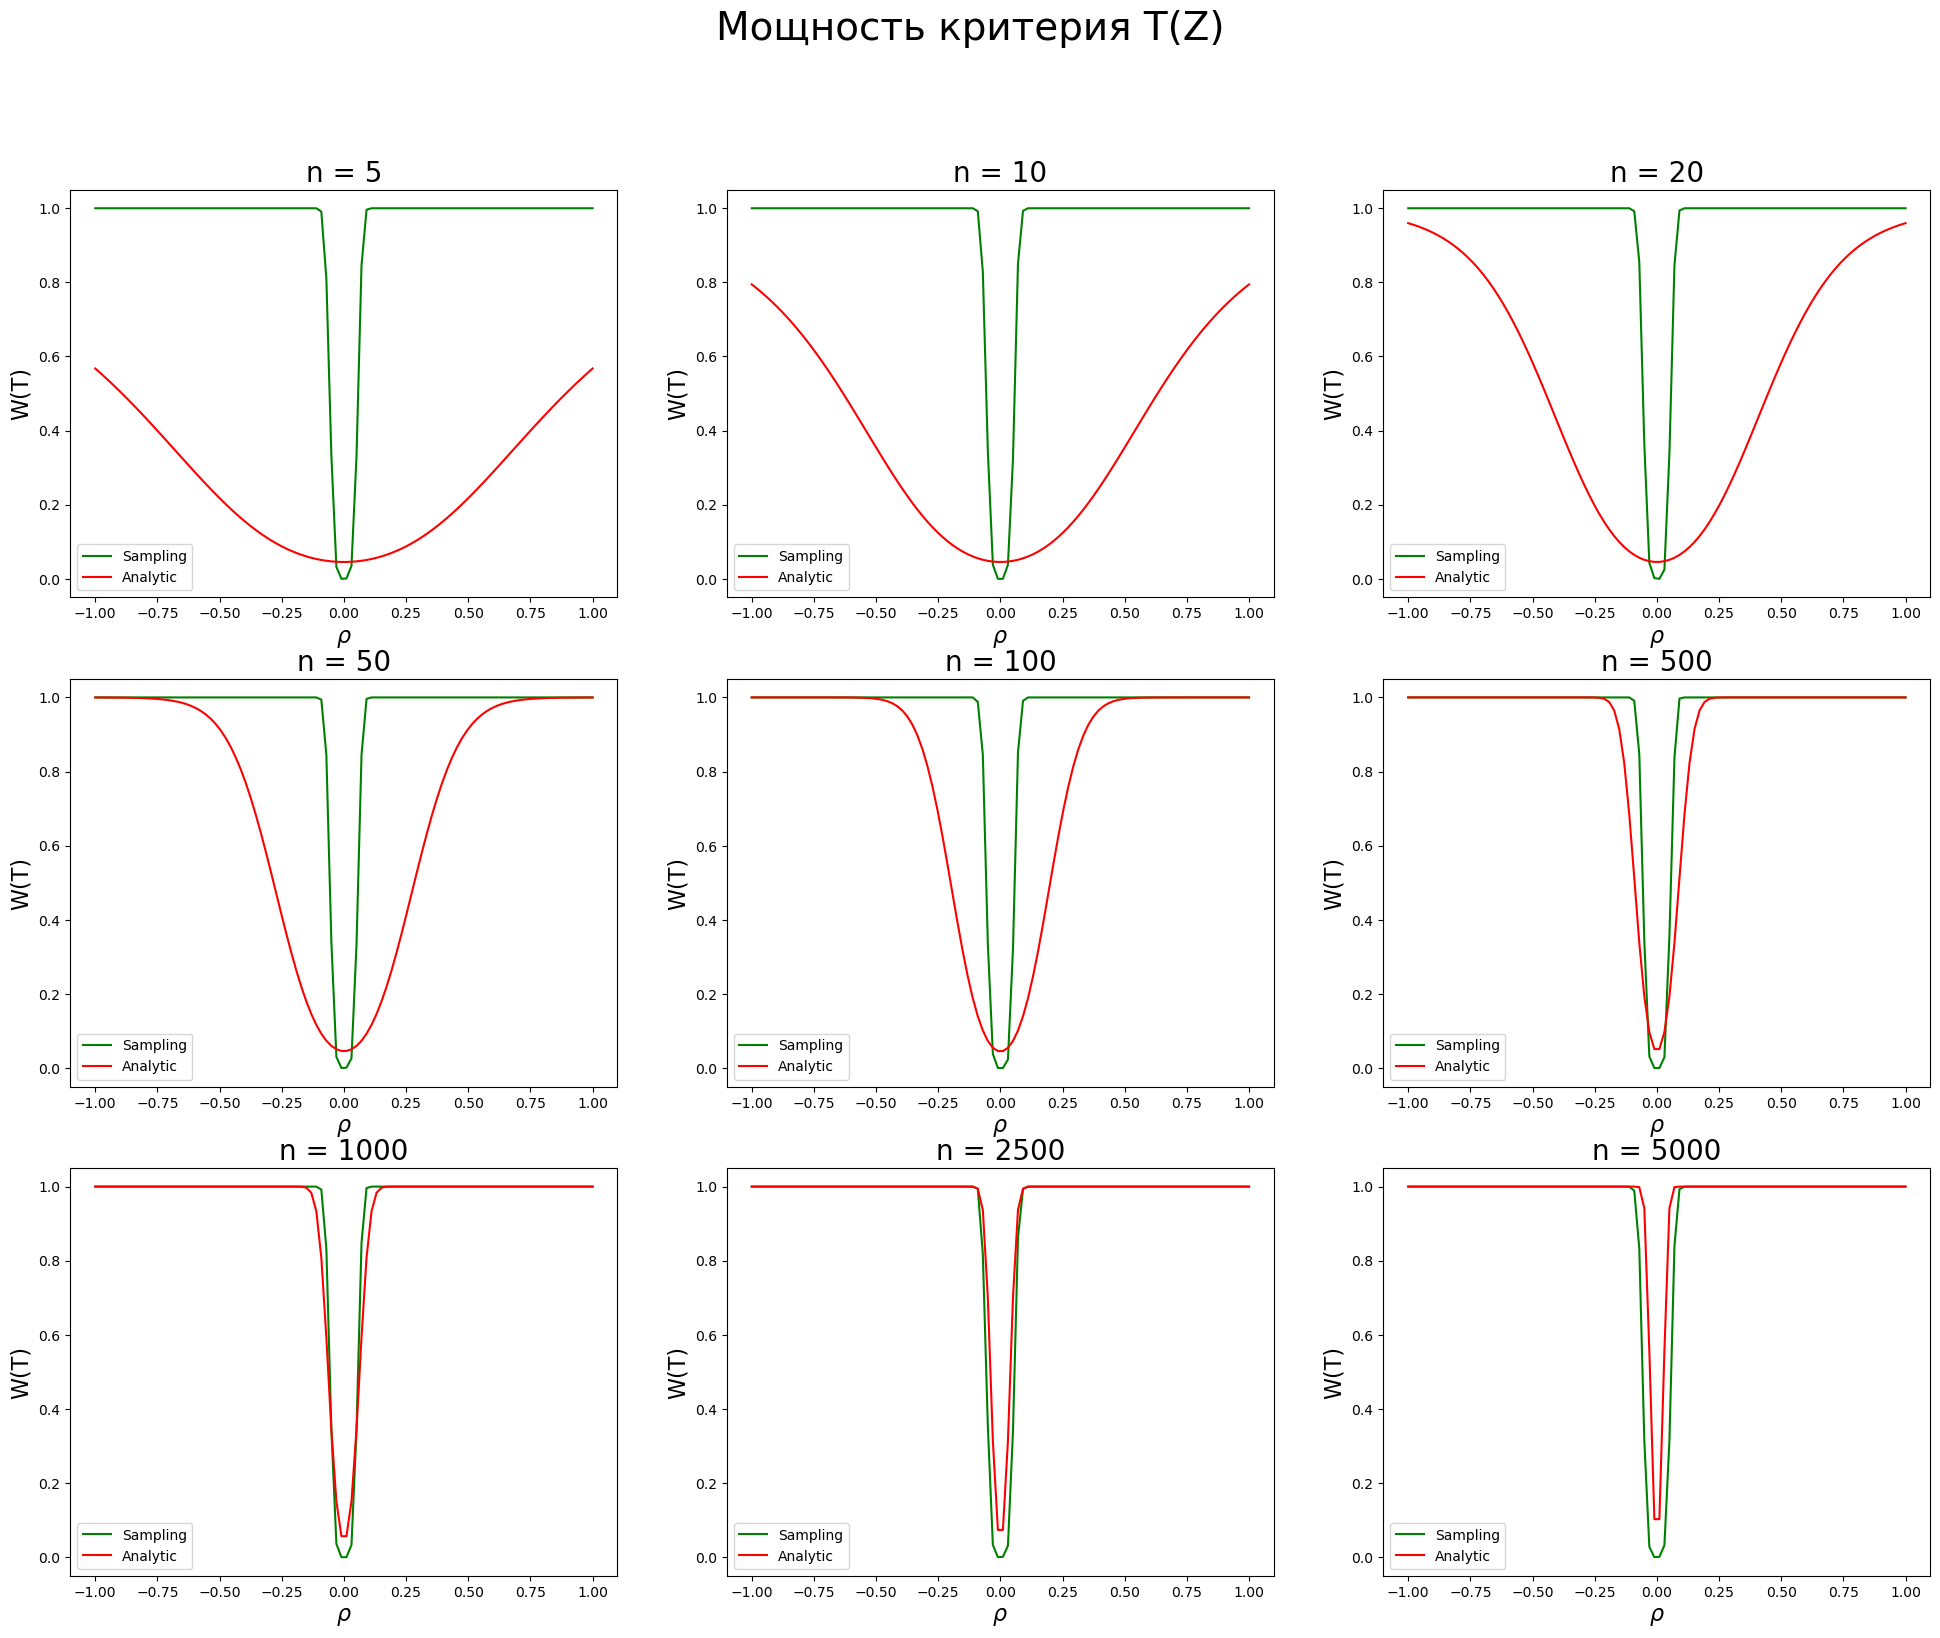

In [102]:
# Графики сравения семплирования и аналитического результата
fig, ax = plt.subplots(3, 3, figsize=(24, 18))
fig.suptitle('Мощность критерия T(Z)', fontsize=28)
i = 0
for n in w_anal.keys():
    ax_tmp = ax[i // 3, i % 3]
    ax_tmp.plot(np.linspace(-1, 1, 100), w_exps[n], color='green', label='Sampling')
    ax_tmp.plot(np.linspace(-1, 1, 100), w_anal[n], color='red', label='Analytic')
    ax_tmp.set_title(f'n = {n}', fontsize=20)
    ax_tmp.set_xlabel(r'$\rho$', fontsize=16)
    ax_tmp.set_ylabel('W(T)', fontsize=16)
    ax_tmp.legend()
    i += 1

plt.show()

4. Перейдем к критерию из лекции.
$$ 
T(Z) = \frac{1}{2n}\sum\limits_{i=0}^n(x_i - y_i)^2 
$$
Найдем распределение величины $x_i - y_i$

$$
\mathbb{E} x_i - y_i = 0, \mathbb{D} x_i - y_i = 1 - \rho + 1 - \rho = 2 - 2\rho
$$
$x_i - y_i \sim Norm(0, 2(1-\rho))$, т.е. получили, что $\frac{(x_i - y_i)^2}{2(1-\rho)} \sim \chi^2(1)$, тогда распределение будет задаваться формулой, $\xi \sim \chi^2(n)$:

$$
T(Z) = \frac{1-\rho}{n}\xi
$$

$t_{\alpha}^{left} = \frac{alpha}{2}$, $t_{\alpha}^{right} = 1 - \frac{\alpha}{2}$ - это все квантили распределения $\xi^2(n)$
$$
U_{кр} = \left \{  Z \in \mathbb{R}^{2n} | T(Z) \le \frac{t_{\alpha}^{left}}{n} or \frac{t_{\alpha}^{right}}{n} \le T(Z) \right \}
$$
$$
W(T) = \mathbb{P} \left \{ \frac{1-\rho}{n}\xi \le \frac{t_{\alpha}^{left}}{n} or \frac{t_{\alpha}^{right}}{n} \le \frac{1-\rho}{n}\xi \right \} =
$$
$$
= 1 - F_{\xi^2(n)}\left( \frac{t_{\alpha}^{right}}{1-\rho}\right) + - F_{\xi^2(n)}\left( \frac{t_{\alpha}^{left}}{1-\rho}\right)
$$

In [89]:
def get_W_new_analytic(rho, n, alpha=0.5):
    if rho >= 1:
        return 1
    t_right = st.chi2(n).ppf(1-alpha/2)
    t_left = st.chi2(n).ppf(alpha/2)
    return 1 - st.chi2(n).cdf(t_right/(1-rho)) + st.chi2(n).cdf(t_left/(1-rho))

def get_T_new(samples):
    return np.mean([(x[0] - x[1])**2 for x in samples]) / 2

alpha = 0.5
w_new_sample = defaultdict(list)
w_new_analytic = defaultdict(list)

for num in tqdm([5, 10, 20, 50, 100, 500, 1000, 2500, 5000]):
    t_right = st.chi2(num).ppf(1-alpha/2)/num
    t_left = st.chi2(num).ppf(alpha/2)/num
    for rho in np.linspace(-1, 1, 100):
        w_new_sample[num].append(get_W_sample(get_T_new, rho, num, t_right, t_left))
        w_new_analytic[num].append(get_W_new_analytic(rho, num, alpha))

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [15:09<00:00, 101.08s/it]


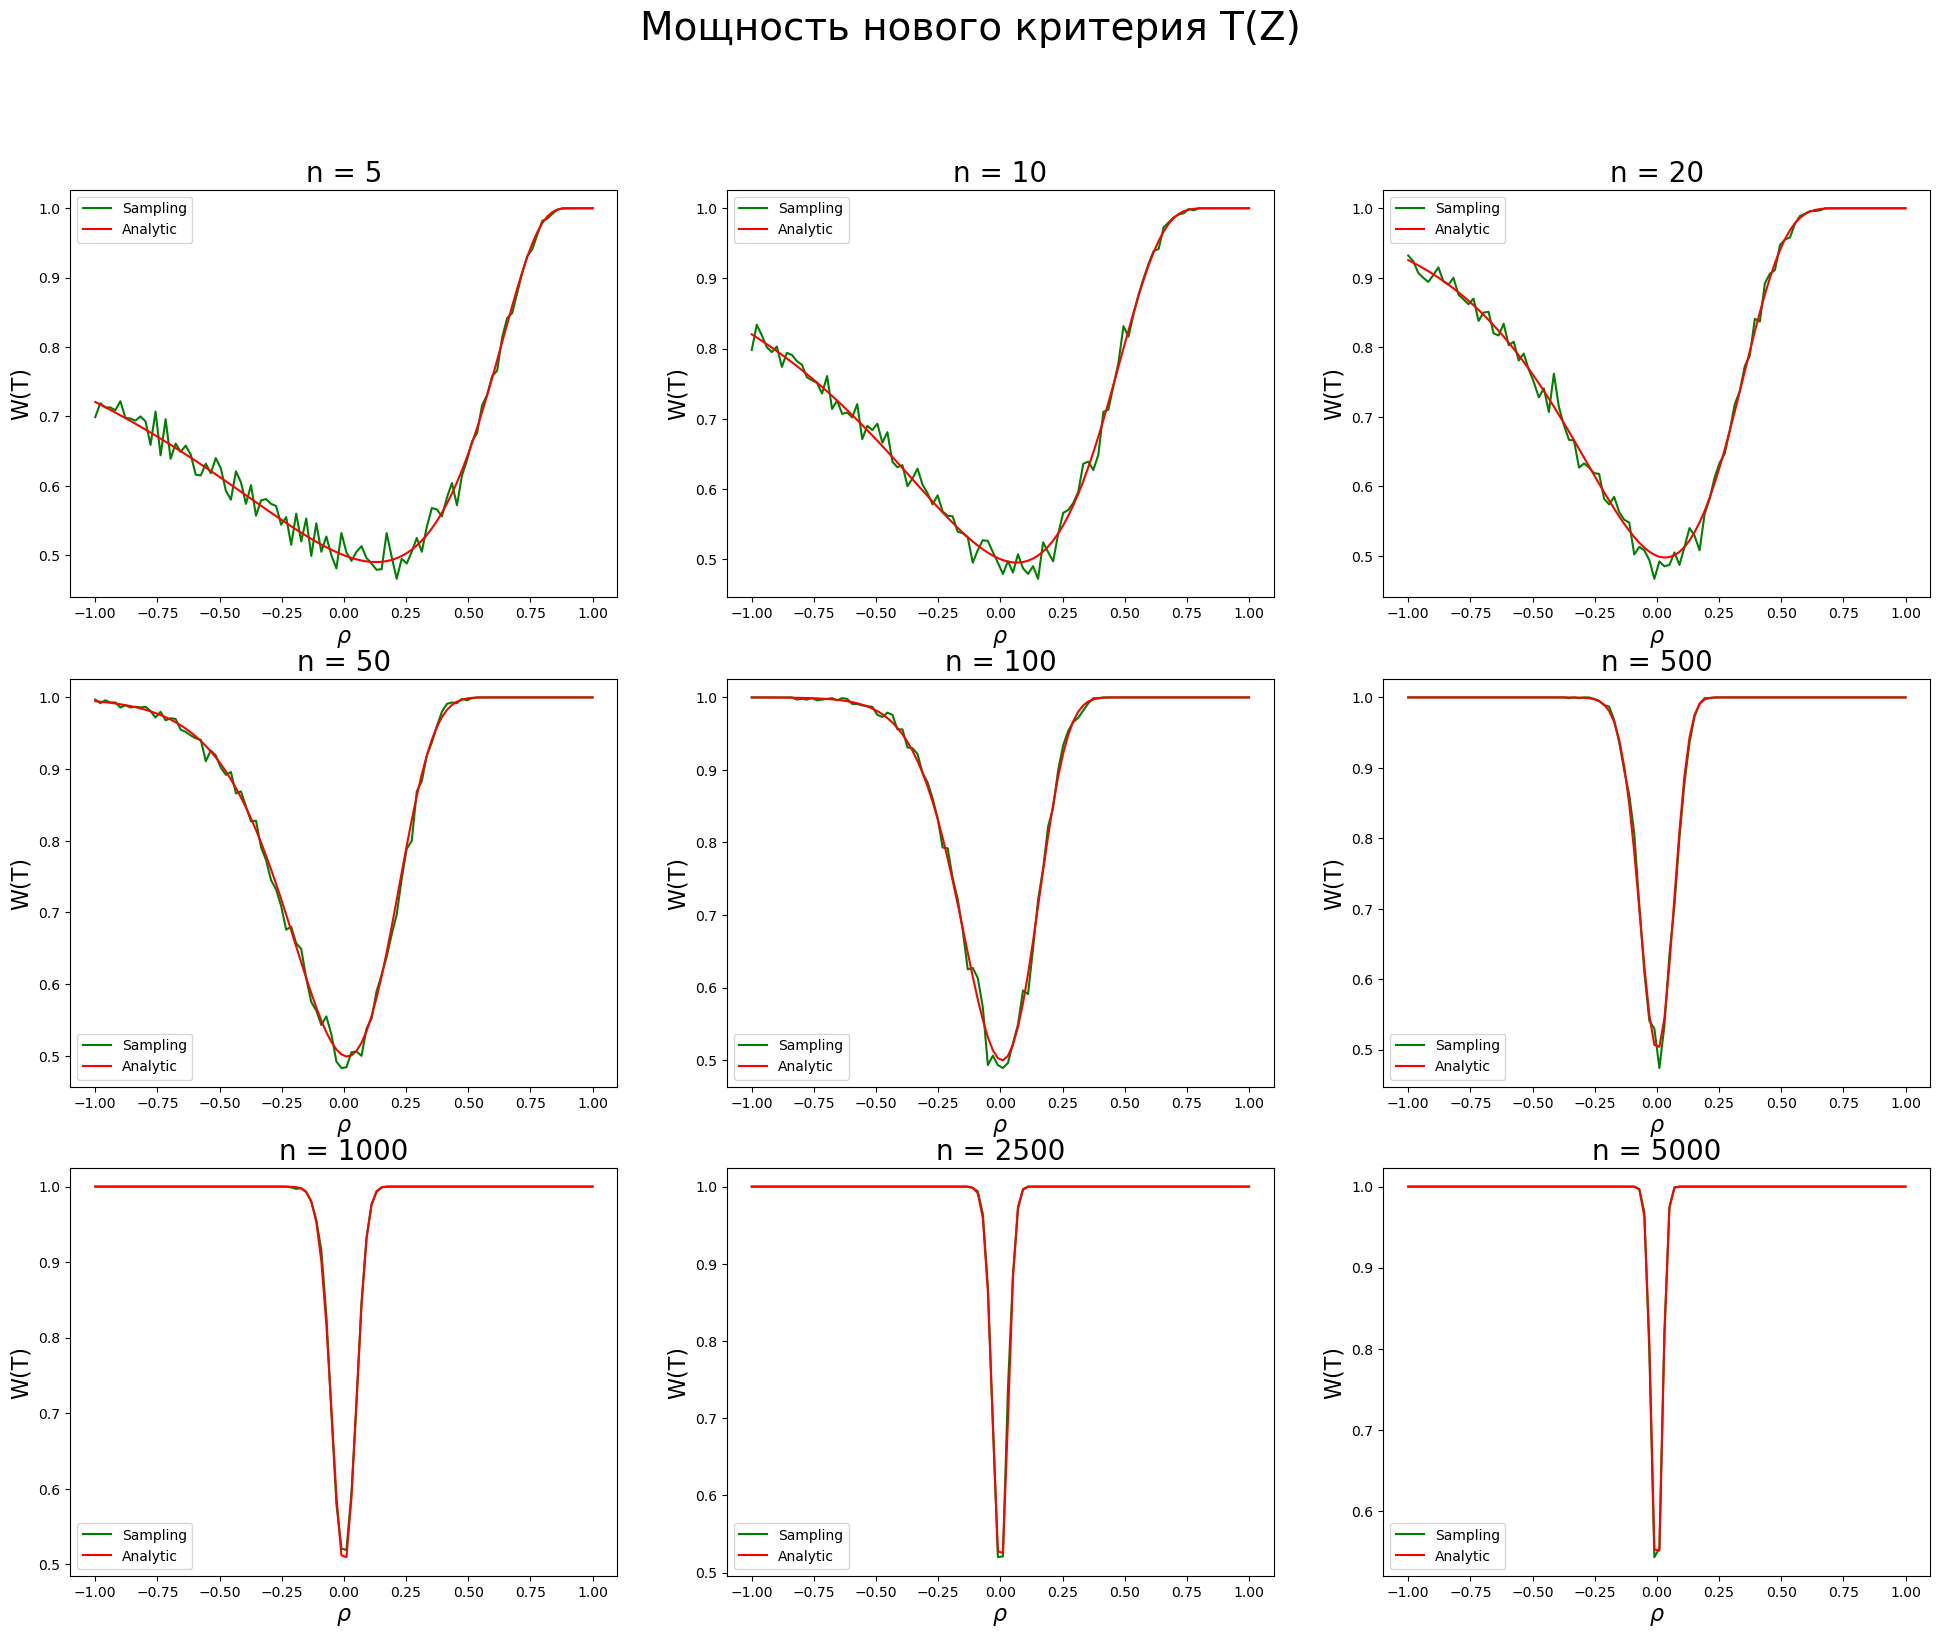

In [103]:
# Графики сравения семплирования и аналитического результата
fig, ax = plt.subplots(3, 3, figsize=(24, 18))
fig.suptitle('Мощность нового критерия T(Z)', fontsize=28)
i = 0
for n in w_anal.keys():
    ax_tmp = ax[i // 3, i % 3]
    ax_tmp.plot(np.linspace(-1, 1, 100), w_new_sample[n], color='green', label='Sampling')
    ax_tmp.plot(np.linspace(-1, 1, 100), w_new_analytic[n], color='red', label='Analytic')
    ax_tmp.set_title(f'n = {n}', fontsize=20)
    ax_tmp.set_xlabel(r'$\rho$', fontsize=16)
    ax_tmp.set_ylabel('W(T)', fontsize=16)
    ax_tmp.legend()
    i += 1

plt.show()

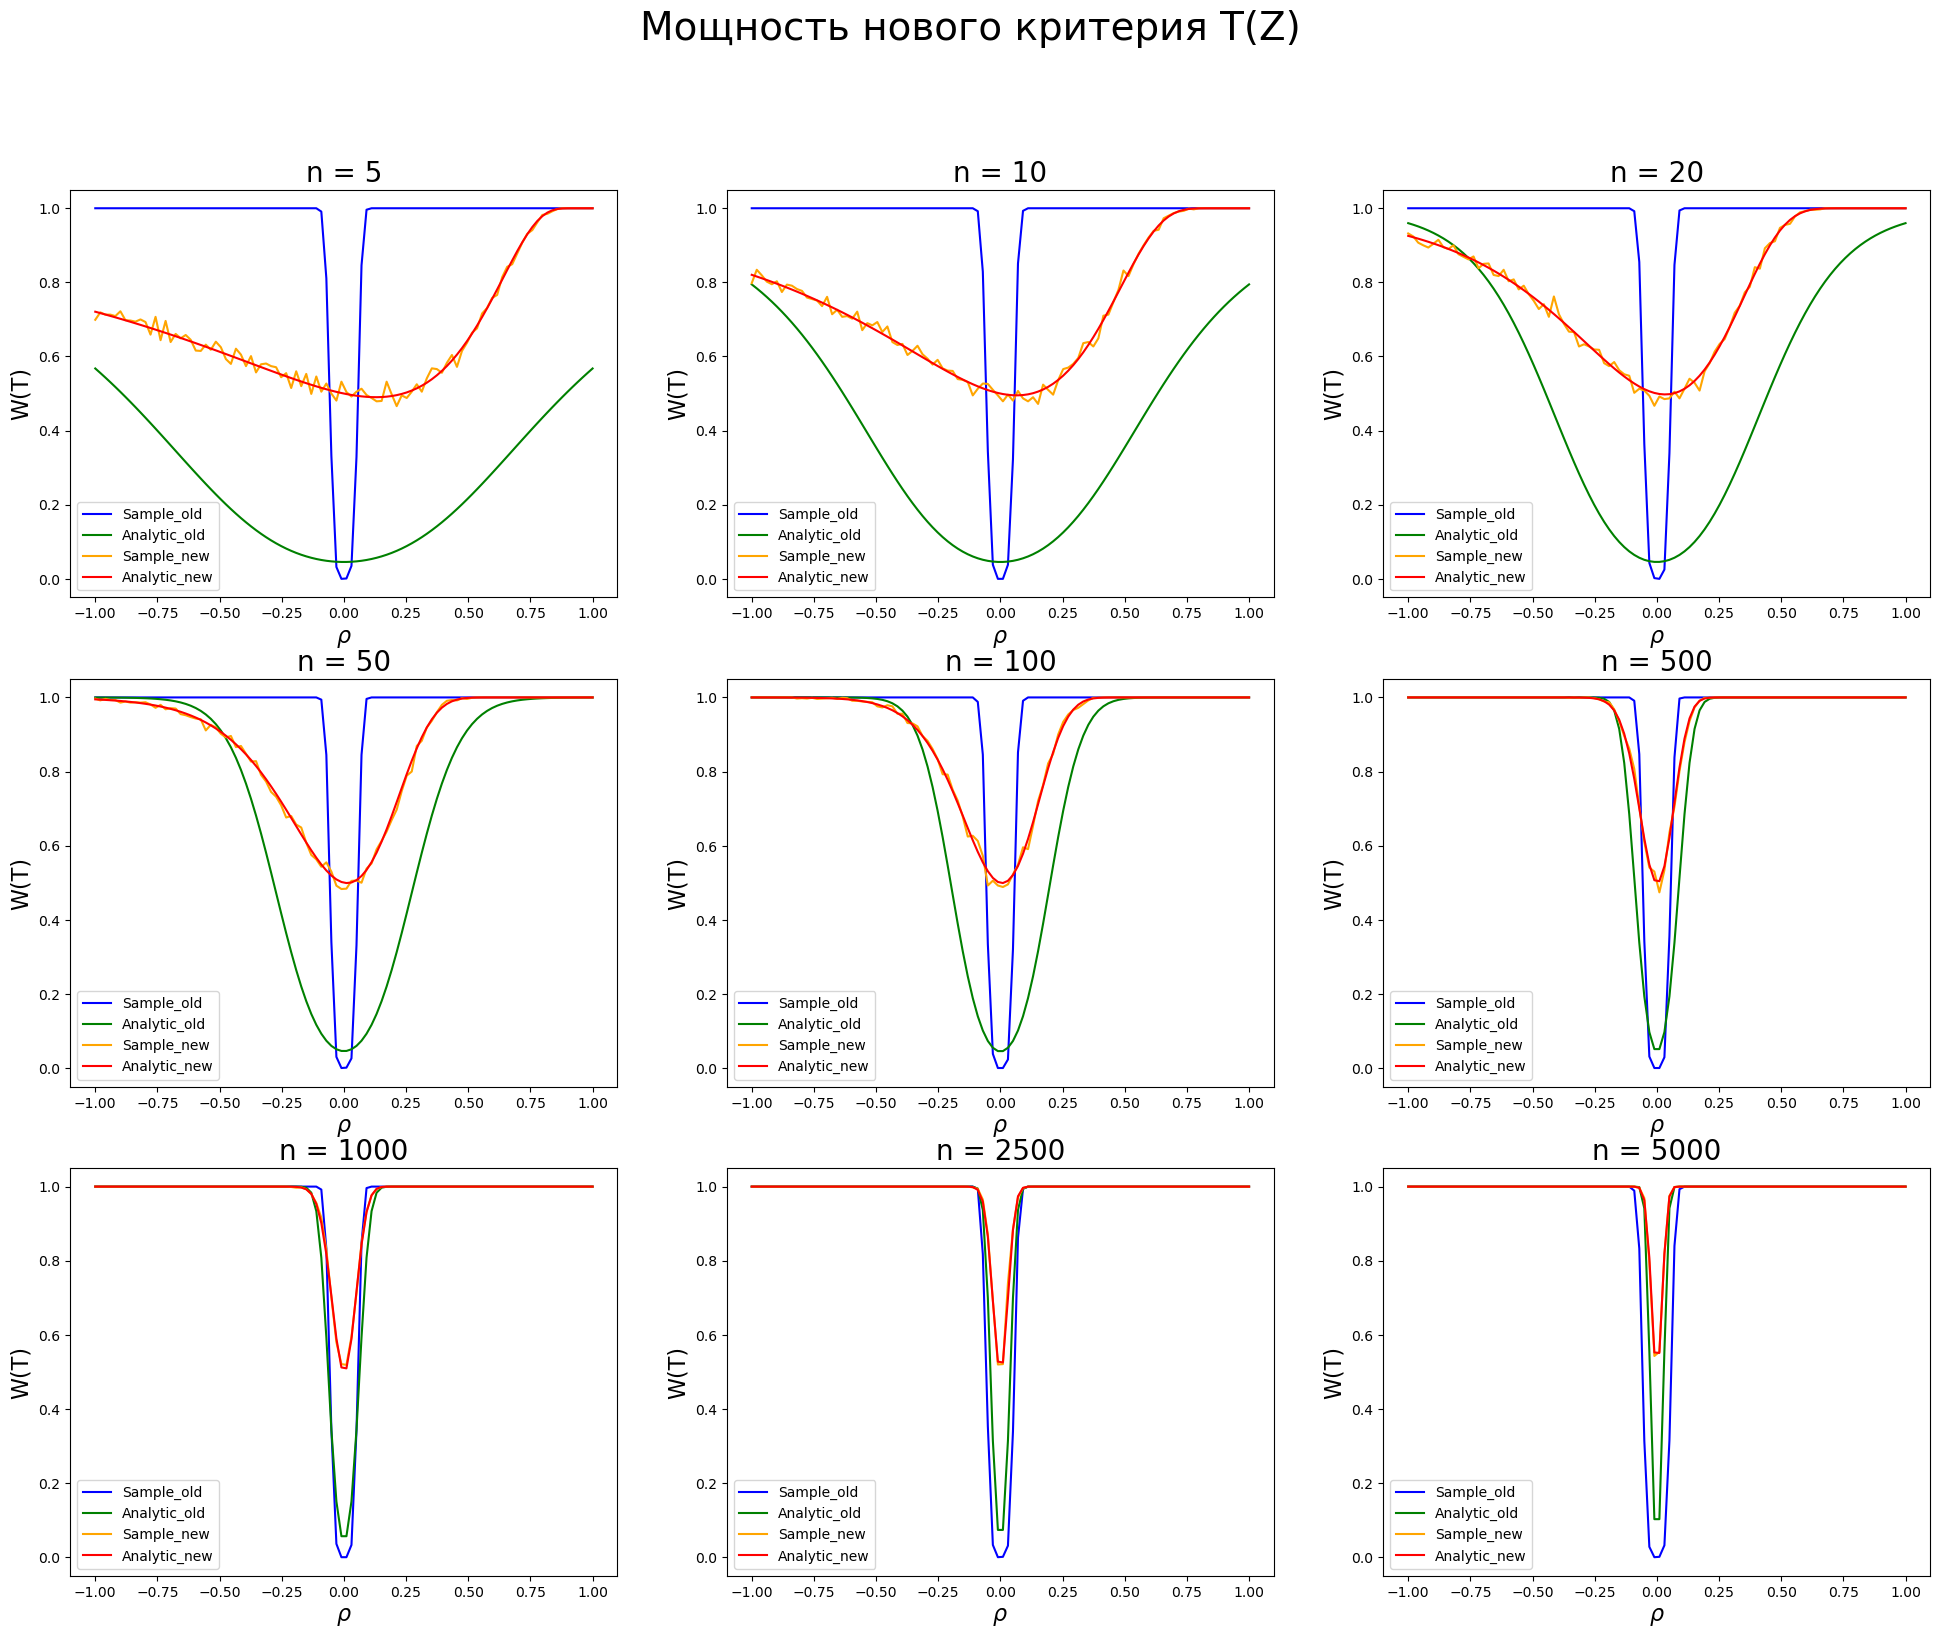

In [104]:
# Сравнение критериев
fig, ax = plt.subplots(3, 3, figsize=(24, 18))
fig.suptitle('Мощность нового критерия T(Z)', fontsize=28)
i = 0
for n in w_anal.keys():
    ax_tmp = ax[i // 3, i % 3]
    ax_tmp.plot(np.linspace(-1, 1, 100), w_exps[n], color='blue', label='Sample_old')
    ax_tmp.plot(np.linspace(-1, 1, 100), w_anal[n], color='green', label='Analytic_old')
    ax_tmp.plot(np.linspace(-1, 1, 100), w_new_sample[n], color='orange', label='Sample_new')
    ax_tmp.plot(np.linspace(-1, 1, 100), w_new_analytic[n], color='red', label='Analytic_new')
    ax_tmp.set_title(f'n = {n}', fontsize=20)
    ax_tmp.set_xlabel(r'$\rho$', fontsize=16)
    ax_tmp.set_ylabel('W(T)', fontsize=16)
    ax_tmp.legend()
    i += 1

plt.show()

#### Вывод: 
При маленьких n лекционный критерий показывает себя лучше нового критерия, но уже при больших n можно наблюдать обратно.
Из чего можно сделать вывод, что при маленьких n лучше использовать новый критерий, а при больших n использовать критерий, предложенный в задаче.

### Задача 4
Пусть $x= \{ x_1, ..., x_n \}$, $n = 12$ есть НОР выборка из $Norm(0, 1)$. Пусть $y = \{y_1, ..., y_n\}$, $n = 12$ есть НОР выборка из $Norm(0, 1)$, независимая от $\{ x_1, ..., x_n \}$. Оценить (сэплированием или приближенно аналитически), сколько разных (и независимых) выборок y нужно рассмотреть K, чтобы найти ту, которая даст выборочную корреляцию с x не менее $\rho = 0.97$. Построить график зависимости $K(\rho)$ в диапозоне от 0 до 0.99. Какой прикладной вывод можно сделать из этого эксперимента помимо известного "корреляция не означает причинность"?

#### Решение:
Рассмотрим случайную величину K - количество выборок y, первые $K-1$, из которых дают корреляцию меньше, чем $\rho$, а K-я даст больше $\rho$ (номер первого успеха в серии испытаний в схеме Бернулли, выведем это)

$$
\mathbb{K} = \sum\limits_{k=1}^{+\infty} k \cdot \mathbb{P}\{K=k\}
$$
$$
\mathbb{K} \{K = k\} = \mathbb{P} \left \{ \rho_{xy_1} < \rho, ..., \rho_{xy_{k-1}} < \rho, \rho_{xy_k} \ge \rho \right \} = / \text{т.к. выборки независимы} / = 
$$
$$
 = \mathbb{P}\{ \rho_{xy_1} < \rho\} \cdot ... \cdot \mathbb{P}\{  \rho_{xy_{k-1}} < \rho \} \cdot \mathbb{P}\{ \rho_{xy_k} \ge \rho\} = /\text{из-за независимости выбора $y_i$ от x} = 
$$
$$
= \left( \mathbb{P}\{\rho_{xy} < \rho \} \right)^{k-1} \cdot \mathbb{P} \{\rho_{xy} \ge \rho \}
$$


Факт, который рассказали в беседе группы про распределение Студента: пары из некоррелированных двумерных нормальных распределений выборочное распределение коэффициента корреляции Пирсона будет соотвествовать t-распределению Стьюдента со степенью свободы $n-2$. Т.е. в нашем случае $t_{n-2} = \frac{\rho_{xy}}{\sigma_{\rho_{xy}}} = \rho_{xy} \cdot \sqrt{\frac{n-2}{1-\rho_{xy}^2}}$ имеет $t(n-2)$, теперь нужно выразить $\rho_{xy}$ и подставить в формулу вероятности $\mathbb{P}\{K = k\}$:
$$
\rho_{xy} = \frac{t_{n-2}}{\sqrt{n-2+t_{n-2}^2}}
$$
$$
\mathbb{P} \{ \rho_{xy} < \rho \} = \mathbb{P} \left \{ \frac{t_{n-2}}{\sqrt{n-2+t_{n-2}^2}} < \rho \right \} = \mathbb{P} \left \{t_{n-2} < \frac{\rho \sqrt{n-2}}{\sqrt{1-\rho^2}} \right \} =
$$
$$
= F_{t_{n-2}} \left( \frac{\rho \sqrt{n-2}}{\sqrt{1-\rho^2}} \right)
$$
Теперь добавим это в серию испытаний схемы Бернулли:
$$
\mathbb{P} \{K=k\} = \left(F_{t_{n-2}} \left( \frac{\rho \sqrt{n-2}}{\sqrt{1-\rho^2}} \right) \right)^{k-1} \left(1-F_{t_{n-2}} \left( \frac{\rho \sqrt{n-2}}{\sqrt{1-\rho^2}} \right) \right)
$$

Матожидание в схеме Бернулли равно $\frac{1}{p}$,
$$
\mathbb{E} K = \frac{1}{1-F_{t_{n-2}} \left( \frac{\rho \sqrt{n-2}}{\sqrt{1-\rho^2}} \right)}
$$
Теперь оценим величину K для $\rho = 0.97$ и $n=12$

In [72]:
def get_K(rho, n):
    stud = st.t(df=n-2)
    el = rho*np.sqrt((n-2)/(1-rho*rho))
    return int(np.ceil(1/(1-stud.cdf(el))))
n = 12
rho = 0.97
print(f'rho = 0.97, n = 12. K = {get_K(rho, n)}')

rho = 0.97, n = 12. K = 10990383


Построим зависимость K от корреляции и от n.

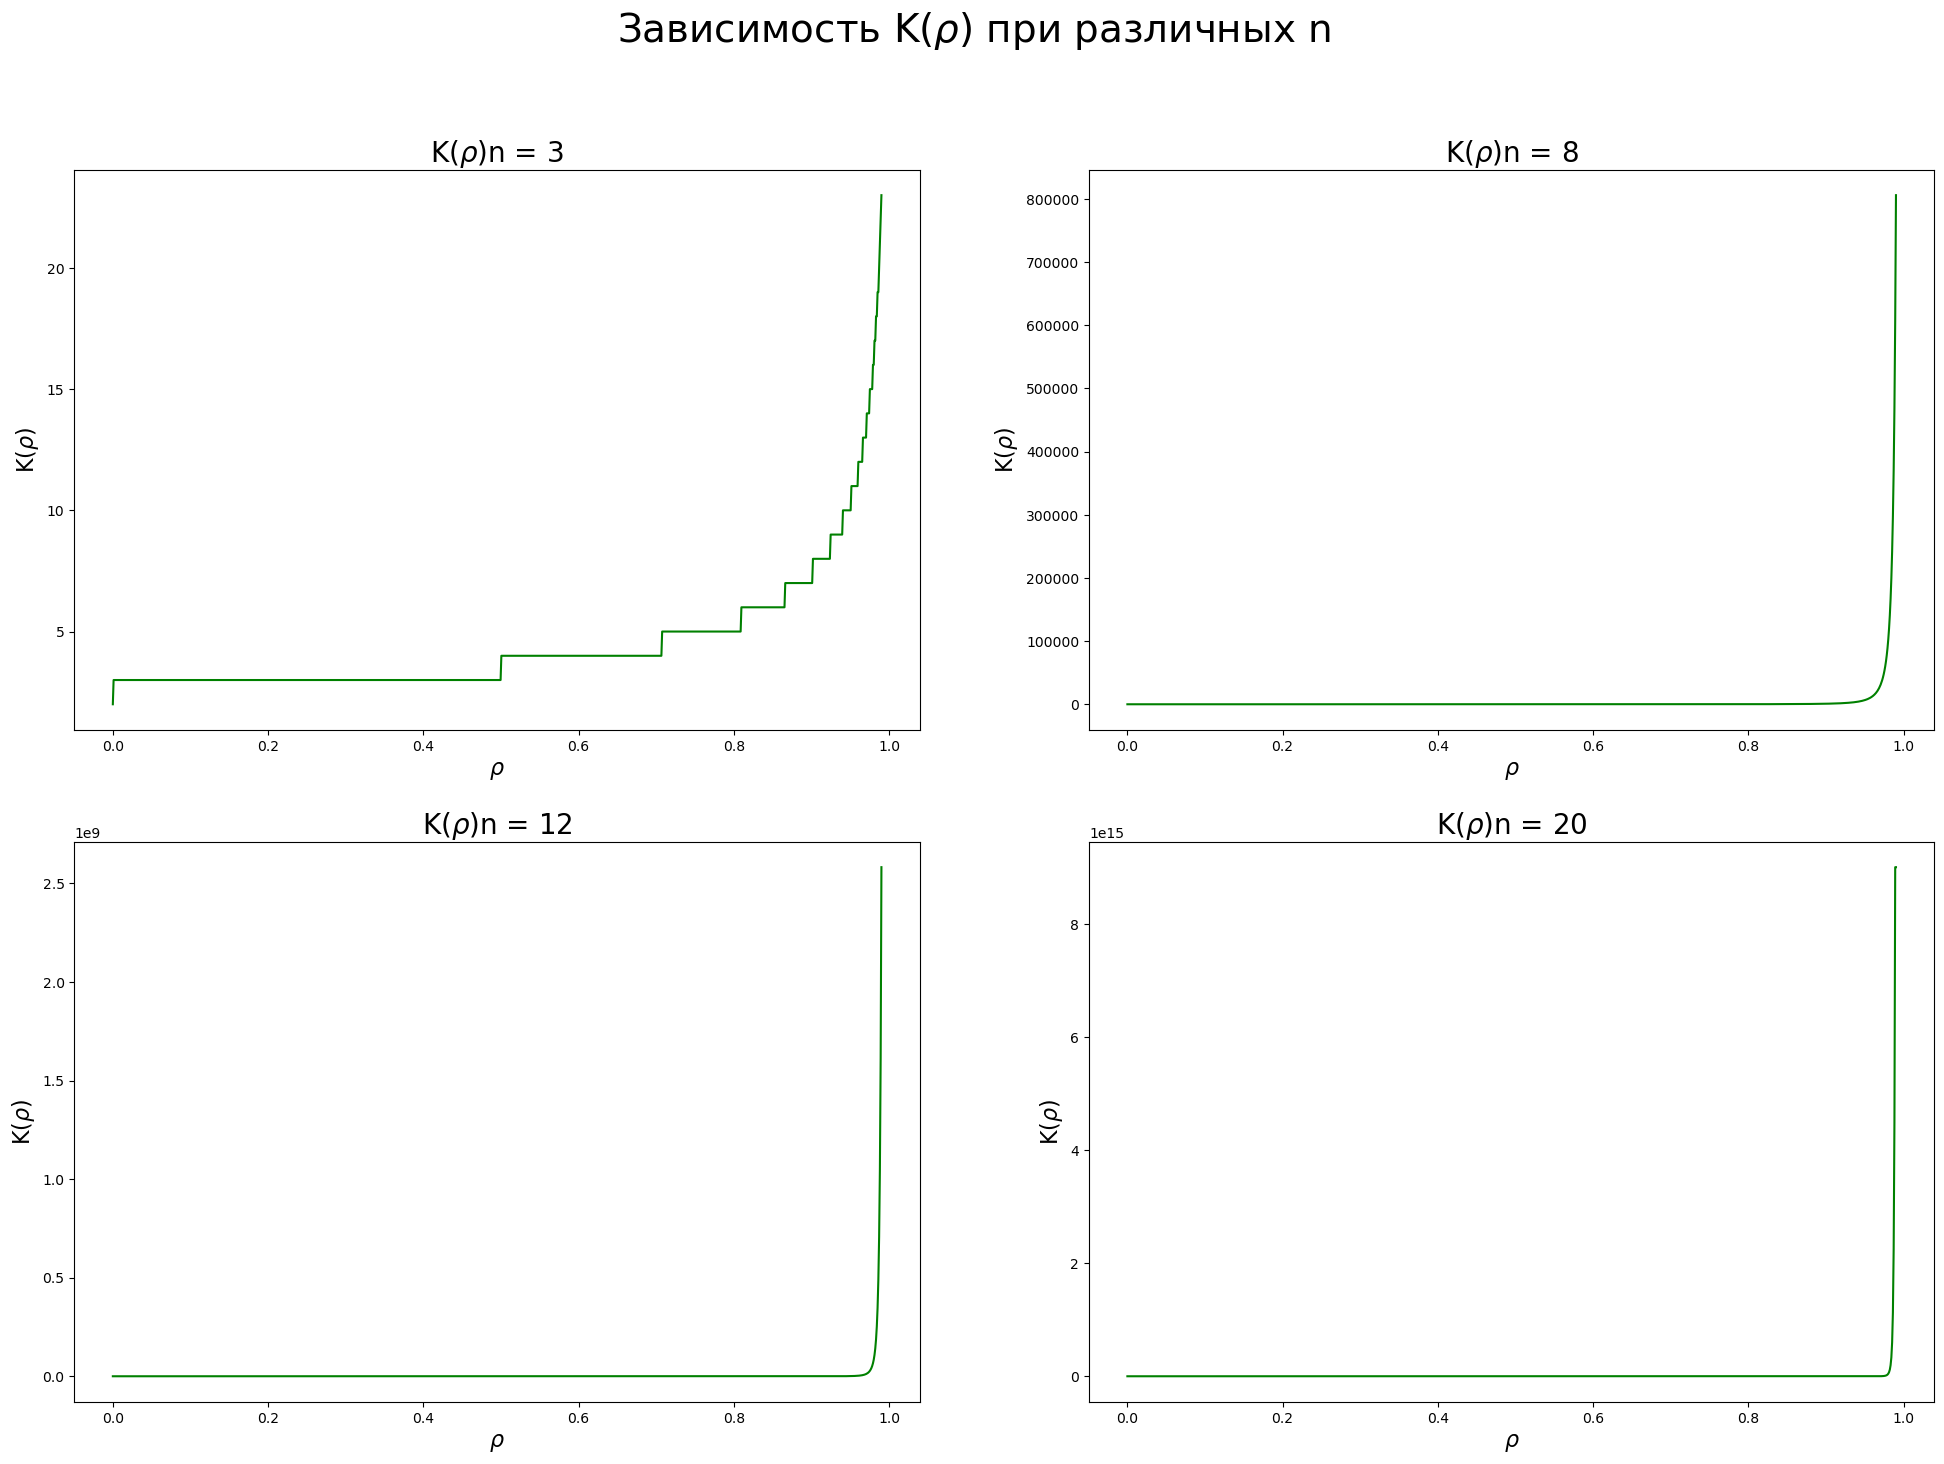

In [75]:
fig, ax = plt.subplots(2, 2, figsize=(24, 16))
fig.suptitle(r'Зависимость K($\rho$) при различных n', fontsize=28)
i = 0
for n in [3, 8, 12, 20]:
    ax_tmp = ax[i // 2, i % 2]
    y = [get_K(x, n) for x in np.linspace(0, 0.99, 1000)]
    ax_tmp.plot(np.linspace(0, 0.99, 1000), y, color='green')
    
    ax_tmp.set_title(r'K($\rho$)'+f'n = {n}', fontsize=20)
    ax_tmp.set_xlabel(r'$\rho$', fontsize=16)
    ax_tmp.set_ylabel(r'K($\rho$)', fontsize=16)
    i += 1

#plt.tight_layout()
plt.show()

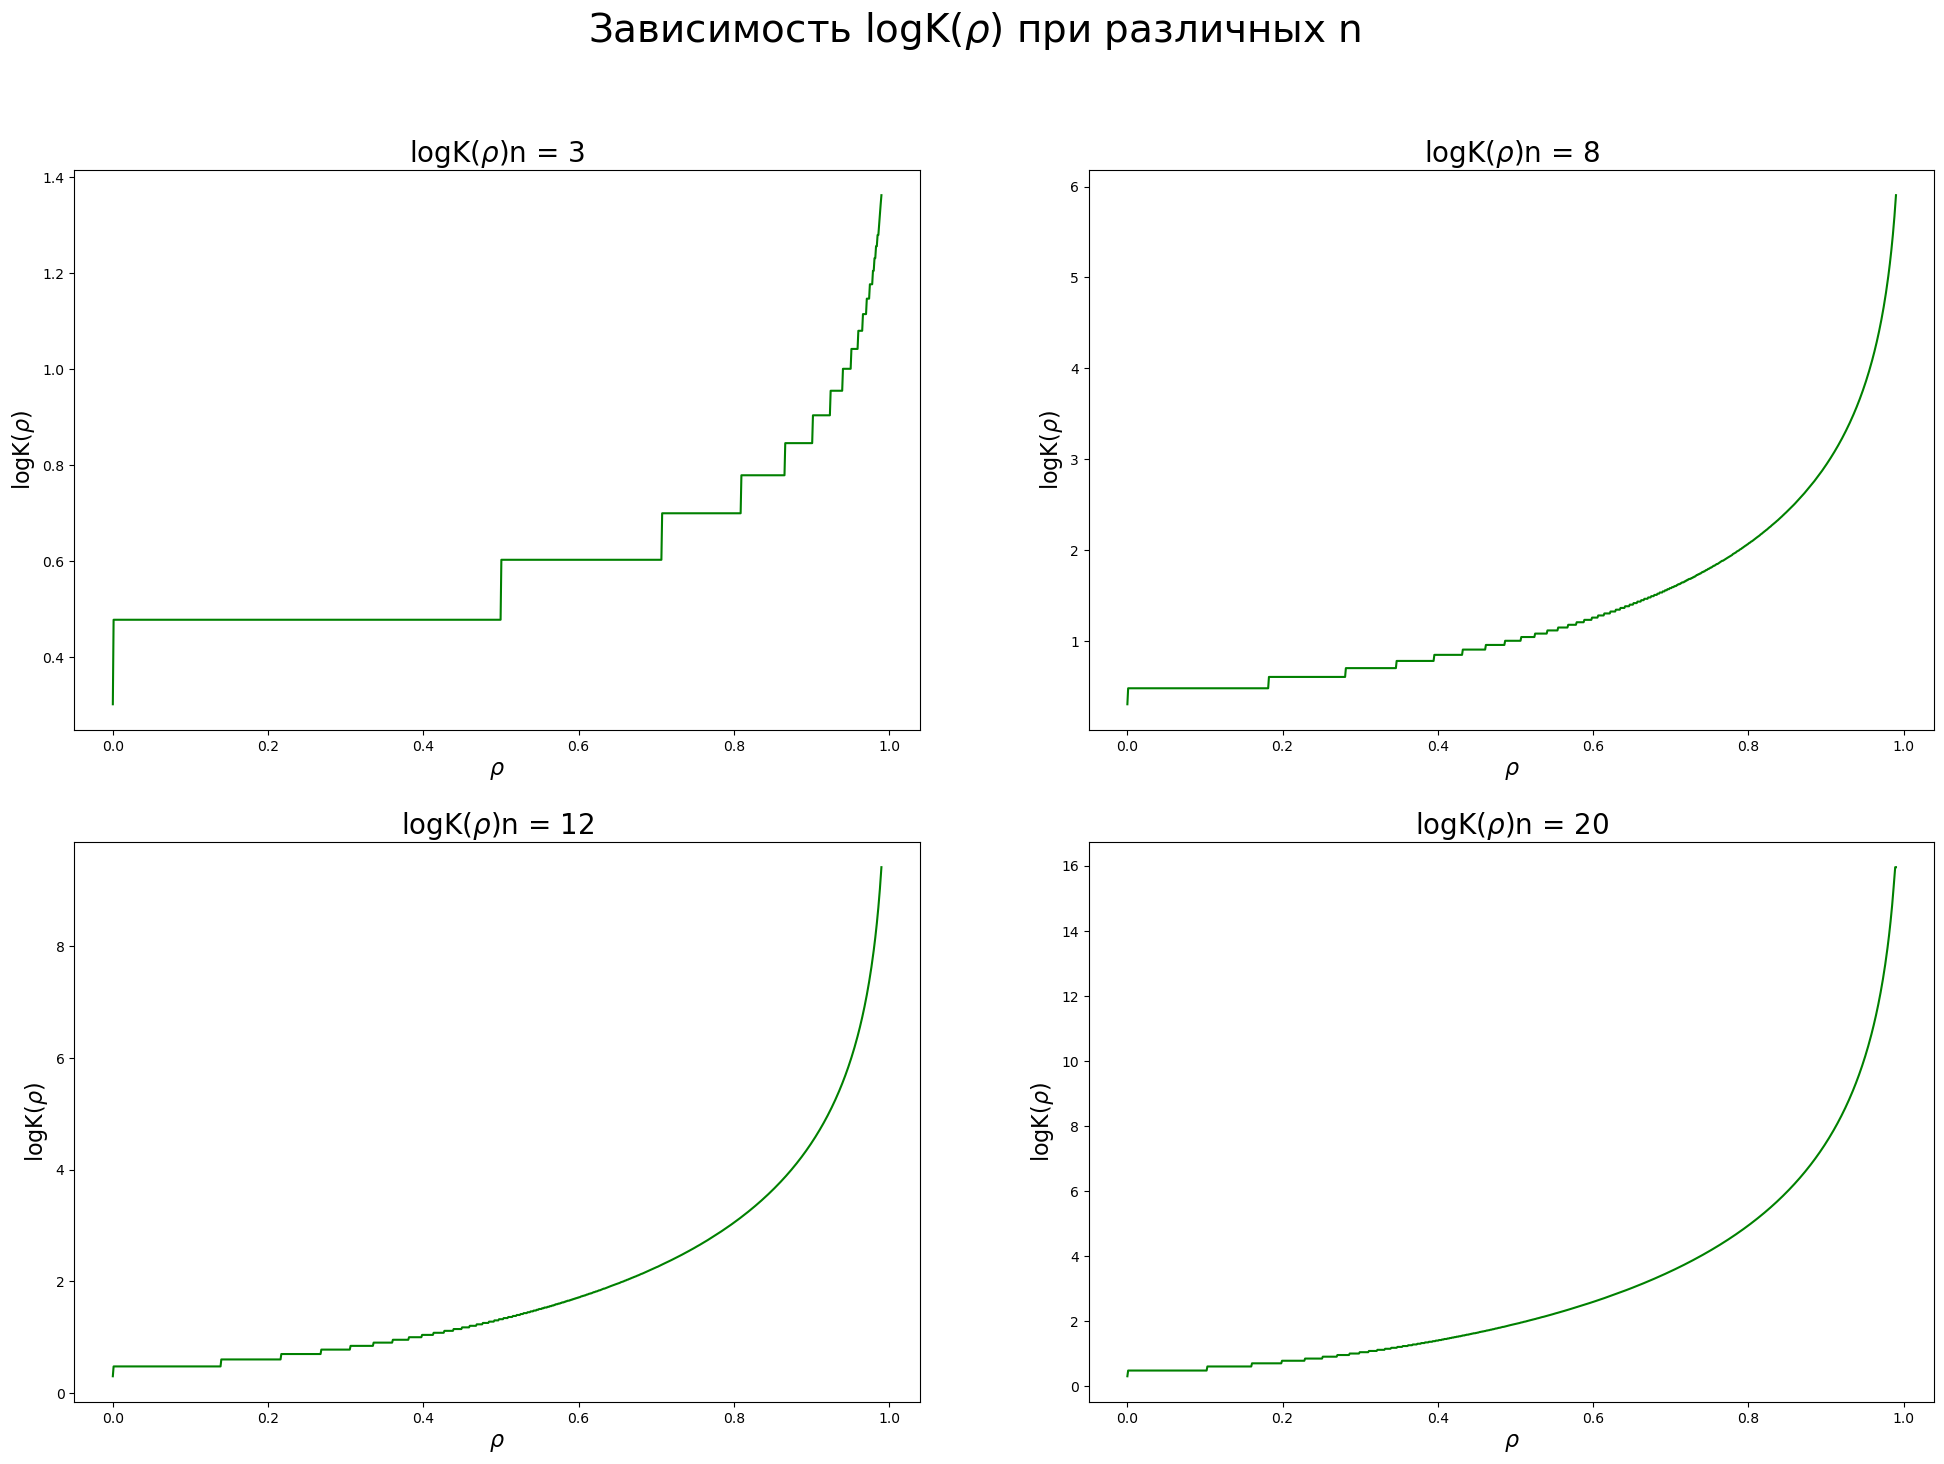

In [81]:
fig, ax = plt.subplots(2, 2, figsize=(24, 16))
fig.suptitle(r'Зависимость logK($\rho$) при различных n', fontsize=28)
i = 0
for n in [3, 8, 12, 20]:
    ax_tmp = ax[i // 2, i % 2]
    y = [np.log10(get_K(x, n)) for x in np.linspace(0, 0.99, 1000)]
    ax_tmp.plot(np.linspace(0, 0.99, 1000), y, color='green')
    
    ax_tmp.set_title(r'logK($\rho$)'+f'n = {n}', fontsize=20)
    ax_tmp.set_xlabel(r'$\rho$', fontsize=16)
    ax_tmp.set_ylabel(r'logK($\rho$)', fontsize=16)
    i += 1

#plt.tight_layout()
plt.show()

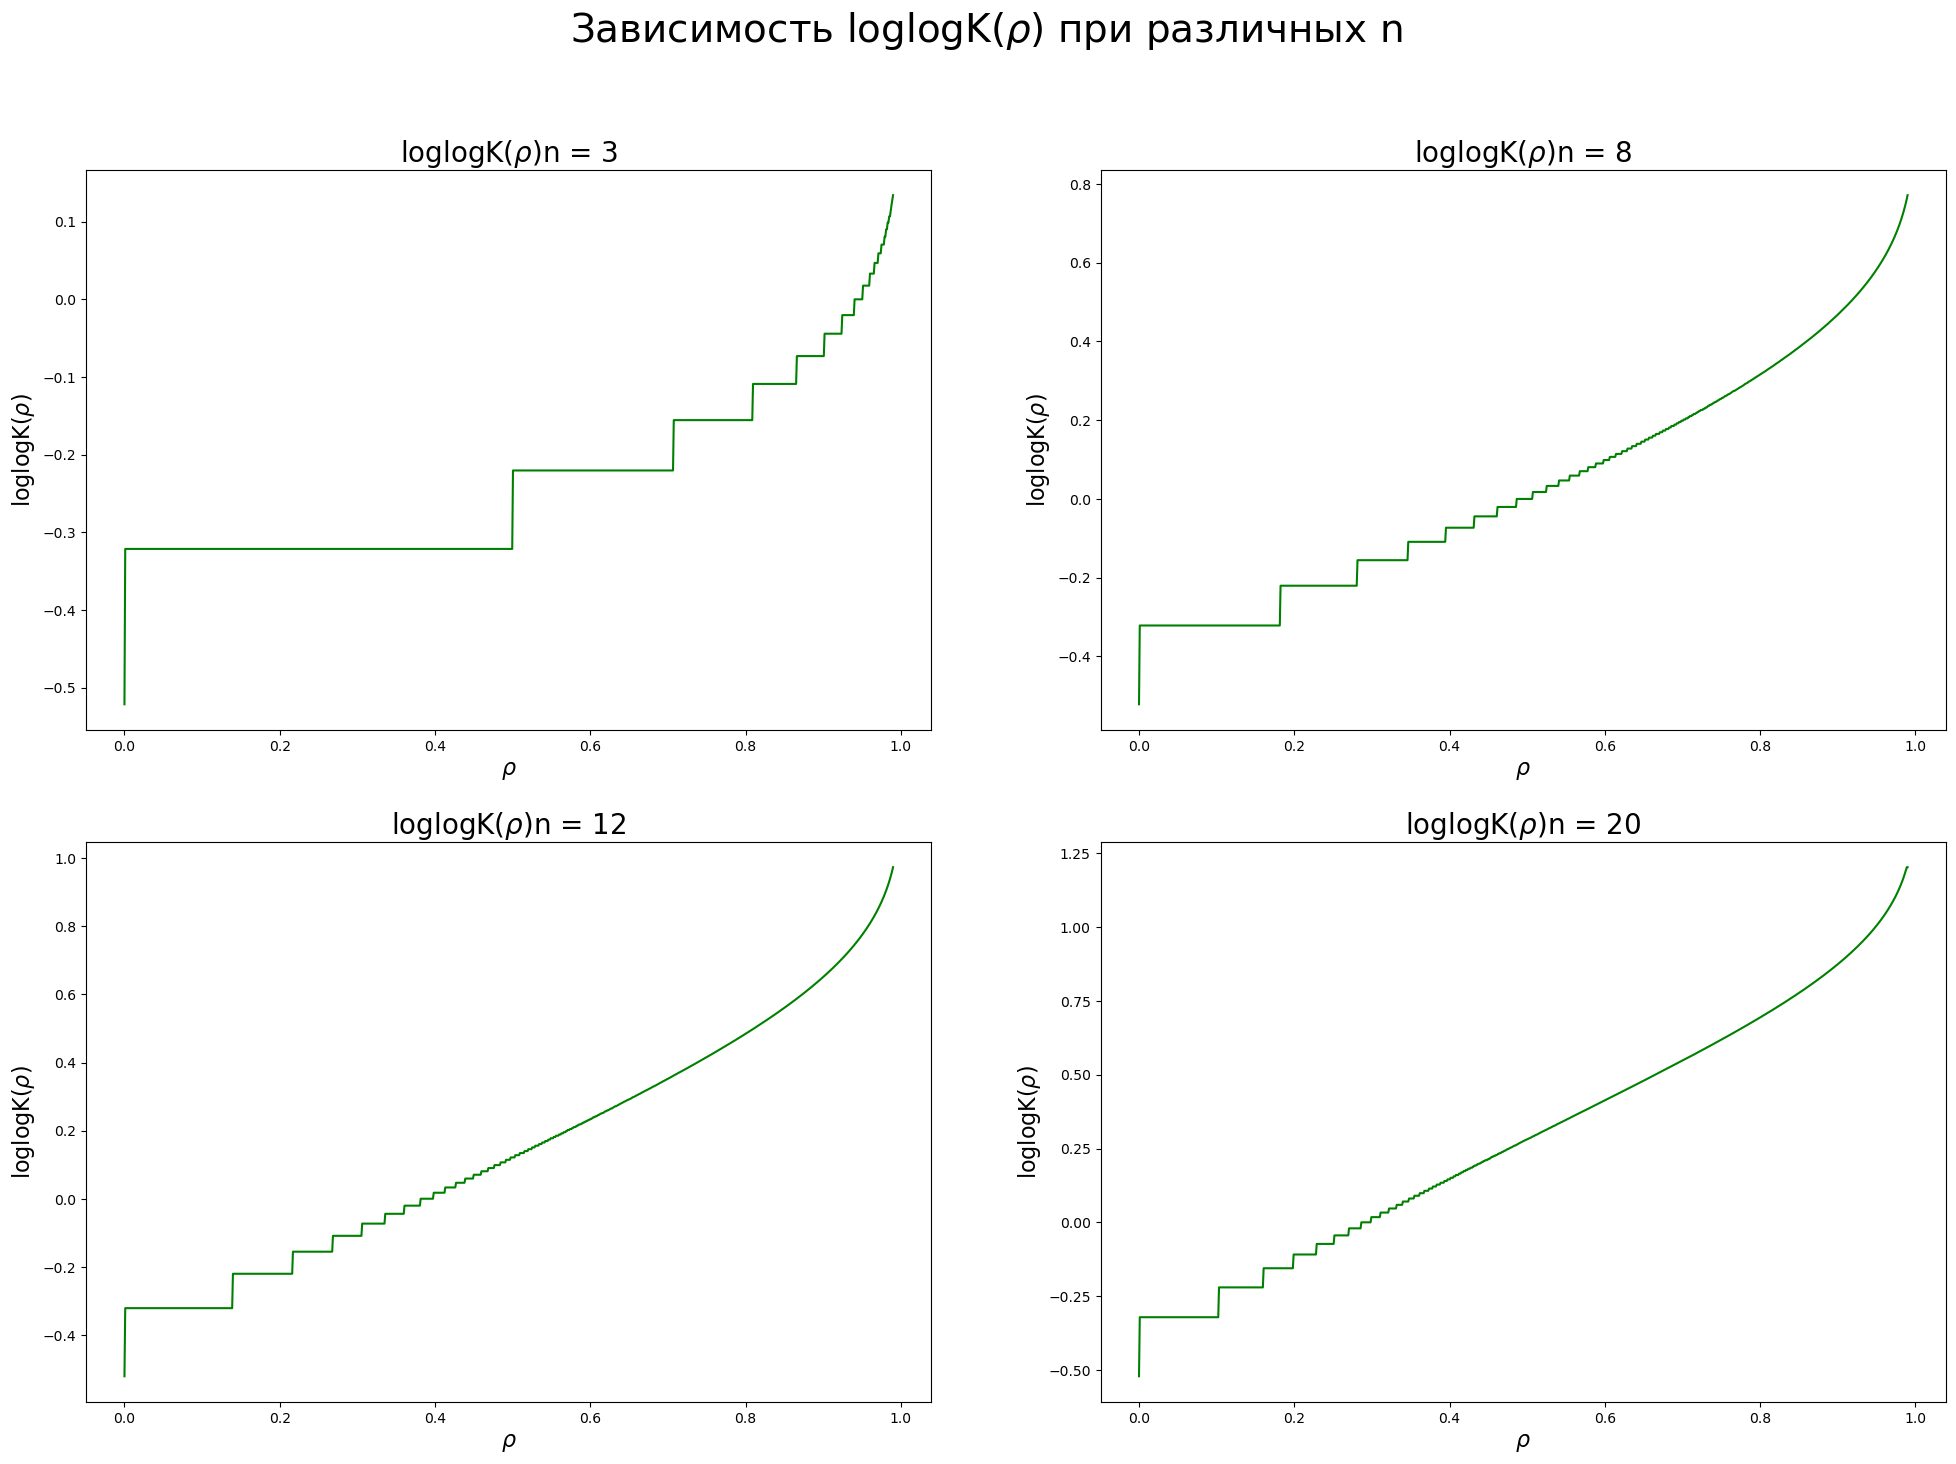

In [80]:
fig, ax = plt.subplots(2, 2, figsize=(24, 16))
fig.suptitle(r'Зависимость loglogK($\rho$) при различных n', fontsize=28)
i = 0
for n in [3, 8, 12, 20]:
    ax_tmp = ax[i // 2, i % 2]
    y = [np.log10(np.log10(get_K(x, n))) for x in np.linspace(0, 0.99, 1000)]
    ax_tmp.plot(np.linspace(0, 0.99, 1000), y, color='green')
    
    ax_tmp.set_title(r'loglogK($\rho$)'+f'n = {n}', fontsize=20)
    ax_tmp.set_xlabel(r'$\rho$', fontsize=16)
    ax_tmp.set_ylabel(r'loglogK($\rho$)', fontsize=16)
    i += 1

#plt.tight_layout()
plt.show()

#### Вывод:
Можно заметить, что $K(\rho)$ растет очень быстро, что даже в масштабе $log(log())$ с какого-то момента график становится похож на экспоненциальный. Из таких графиков удобно выбирать при каком $\rho$ мы уже будем считать, что выборки независимы, например, если у нас $\rho ge 0.85$, то можно считать, что они независимы, ведь нам пришлось сгенерировать $10^4$ таких выборок, можно заметить, что при меньшем n таких выборок, нужно меньше, а при большем больше :)

### Задача 5
Привести пример, когда наивный байесовский классификатор классифицирует объекты не лучше, чем наугад, хотя генеральная совокупность (все возможные объекты) не разделима?

#### Пример:
На лекции приводился пример, когда у нас было два класса, и наивный Байесовский классификатор имел следующий вид:
$$
f(x) = \argmax_{k} \left( p(C_k) \prod_{i=1}^n p(x_i|C_k)\right)
$$
Теперь выпишем вероятности вероятности из лекции:
$$
p(x|C_1) = Norm \left(0, \left(\begin{array}{cc} 
1 & 0 \\ 
0 & 1
\end{array}\right) \right), p(x|C_2) = Norm \left(0, \left(\begin{array}{cc} 
1 & 1 \\ 
1 & 1
\end{array}\right) \right)
$$

Понятно, что объекты класса $C_2$ лежит на прямой $x_1=x_2$, в то  время, как объекты класса $C_1$ лежат на всей плоскости, но как известно из курса функционального анализа мера прямой в $R^2$ равна нулю, поэтому построив классификатор следующим образом: если объект лежит на прямой $x_1 = x_2$ относим его к классу $C_2$, в противном случае к классу $C_1$ получим идеально разделимые классы.

Но наивный Байесовский классификатор будет иметь следующие вероятности для объектов разных классов:
$$
p(x_1|C_1) = p(x_2|C_2) = p(x_1|C_2) = p(x_2|C_1) = Norm(0, 1)
$$
Получается, что классы идеально разделимы, а наивный Байесовский классификатор разделяет классы не лучше, чем наугад.